## Polynomial Regression with various degrees 

Weights for  0  degree [0.08057645]
Train Loss for  0  degree 0.6901610369193
Test loss for  0  degree 0.6629515092849156


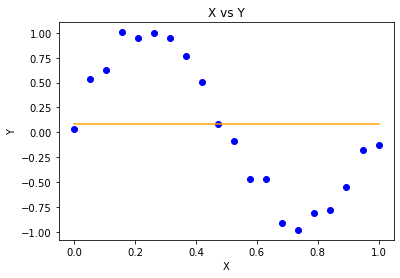

Weights for  1  degree [ 1.11884909 -2.05491462]
Train Loss for  1  degree 0.4496006589157786
Test loss for  1  degree 0.49114124241312845


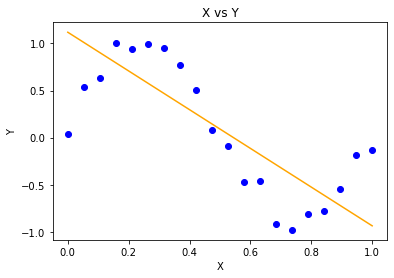

Weights for  2  degree [ 1.26744854 -2.89577478  0.85934875]
Train Loss for  2  degree 0.4262705903437356
Test loss for  2  degree 0.5219534063901462


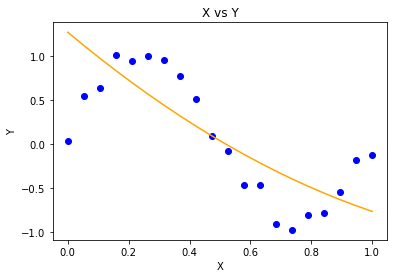

Weights for  3  degree [ 1.48168059 -3.05023361 -1.2744008   2.36295722]
Train Loss for  3  degree 0.36367287718145397
Test loss for  3  degree 0.5697491982974486


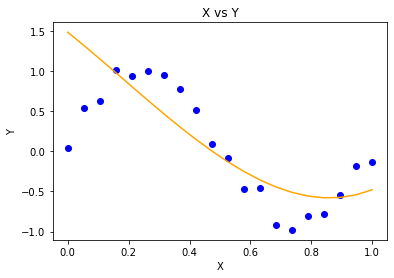

Weights for  4  degree [ 1.46586986 -2.39380924 -2.14788726  0.15696898  2.59818315]
Train Loss for  4  degree 0.3119483943645226
Test loss for  4  degree 0.5516787241113698


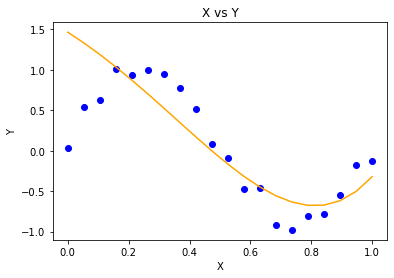

Weights for  5  degree [ 1.37302362 -1.75604662 -2.32002408 -0.86940765  0.9040607   2.42509887]
Train Loss for  5  degree 0.2687602515688072
Test loss for  5  degree 0.5148116285410758


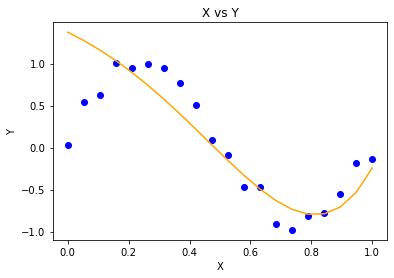

Weights for  6  degree [ 1.28471065 -1.3125146  -2.25694106 -1.31012034  0.03045865  1.21910348
  2.14477917]
Train Loss for  6  degree 0.23579300631092404
Test loss for  6  degree 0.49114785584398113


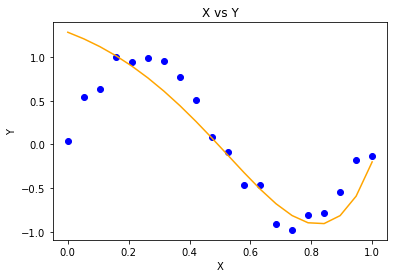

Weights for  7  degree [ 1.21680653 -1.02795524 -2.13705201 -1.48581309 -0.42444643  0.53864559
  1.29287959  1.85197564]
Train Loss for  7  degree 0.2130621057773731
Test loss for  7  degree 0.4865073671660122


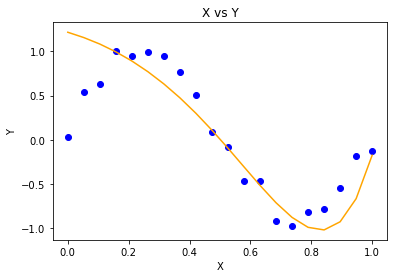

Weights for  8  degree [ 1.16758907 -0.84909437 -2.01891431 -1.5433327  -0.66464278  0.14387296
  0.77723009  1.24520588  1.58284556]
Train Loss for  8  degree 0.19858278475847477
Test loss for  8  degree 0.49714117279257203


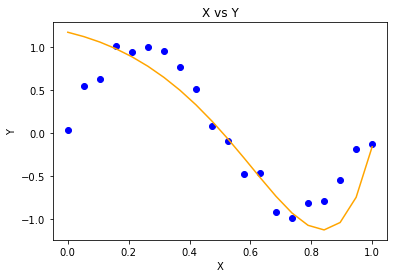

Weights for  9  degree [ 1.13253253 -0.73691555 -1.91874656 -1.54934424 -0.79256719 -0.09171239
  0.45531844  0.85710644  1.14516749  1.34974363]
Train Loss for  9  degree 0.18990514695037367
Test loss for  9  degree 0.5174789229294429


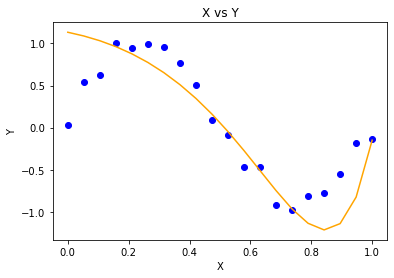

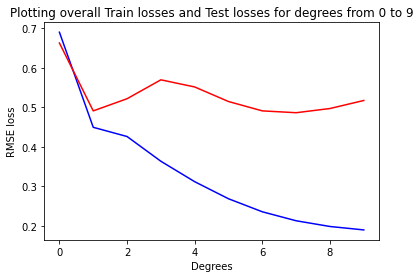

For 0 degree the weights are
       W0
---------
0.0805765
For 1 degree
     W0        W1
-------  --------
1.11885  -2.05491
For 3 degree
     W0        W1       W3       W4
-------  --------  -------  -------
1.48168  -3.05023  -1.2744  2.36296
For 9 degree
     W0         W1        W2        W3         W4          W5        W6        W7       W8       W9
-------  ---------  --------  --------  ---------  ----------  --------  --------  -------  -------
1.13253  -0.736916  -1.91875  -1.54934  -0.792567  -0.0917124  0.455318  0.857106  1.14517  1.34974


In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tabulate import tabulate
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     

   
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
        self.train_loss=0
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
       
                 
        # gradient descent learning
        lossTracker=[]
        loss=0
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
         
            error = (h - self.Y)
            #print(error)
            
            
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_transform.T, error )
            
        #print(self.W)
        #print(Y)
        
        train_pred=np.dot(X_transform,self.W)
        self.train_loss=math.sqrt(np.mean((train_pred-Y)**2))
        #print("Train loss--",train_loss)
        return self.W,self.train_loss 
     
   
        
        
        
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
       # X_transform = self.transform( X )
         
        m, n = X.shape 
        
        X_transform = np.ones( ( m, 1 ) )
        
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   
     
    # Create dataset
    n=20
    X = np.sort(np.linspace(0, 1, n))
    N = np.random.normal(0, 1, size=20)
    Y = np.sin(2*np.pi*X)+ N*0.1
    X=X.reshape(-1,1)
    
     
    
    
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.5, random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
  
    # model training
    TrainTracker=[]
    TestTracker=[]
    degree0weights=[]
    degree1weights=[]
    degree3weights=[]
    degree9weights=[]
    
    for i in range(10):
        model = PolynomailRegression( degree = i, learning_rate = 0.01, iterations = 30000 )
    
        W,train_loss=model.fit( X_train, Y_train )
        print("Weights for ",i," degree",model.W) 
        if i==0 :
            degree0weights.append(model.W)
        if i==1 :
            degree1weights.append(model.W)
        if i==3 :
            degree3weights.append(model.W)
        if i==9 :
            degree9weights.append(model.W)
        print("Train Loss for ",i," degree",model.train_loss)
        # Prediction on training set
        TrainTracker.append(model.train_loss)
        Y_pred = model.predict( X )
   
        # Visualization
    
        y_predic=model.predict(X_test)
        test_error=y_predic-Y_test
        print("Test loss for ",i," degree",math.sqrt(np.mean((test_error)**2)))
        TestTracker.append(math.sqrt(np.mean((test_error)**2)))
        plt.scatter( X, Y, color = 'blue' )
    
  
        plt.plot( X, Y_pred, color = 'orange' )
     
        plt.title( 'X vs Y' )
     
        plt.xlabel( 'X' )
     
        plt.ylabel( 'Y' )
     
        plt.show()
         
       
    
    
    
    plt.plot(TrainTracker, label="train" ,color="blue")
    plt.plot(TestTracker, label="test" ,color="red")
    plt.title( 'Plotting overall Train losses and Test losses for degrees from 0 to 9' )
    plt.xlabel( 'Degrees' )
    plt.ylabel( 'RMSE loss' )
    plt.show()
    
    print("For 0 degree the weights are")
    print(tabulate(degree0weights, headers=["W0"]))
    print("For 1 degree")
    print(tabulate(degree1weights, headers=["W0","W1"]))
    print("For 3 degree")
    print(tabulate(degree3weights, headers=["W0","W1","W3","W4"]))
    print("For 9 degree")
    print(tabulate(degree9weights, headers=["W0","W1","W2","W3","W4","W5","W6","W7","W8","W9"]))
    

    
    
    
if __name__ == "__main__" :
     
    main()

## Increasing data points

Weights for  0  degree [-0.10271559]
Train Loss for  0  degree 0.6580850104631565
Test loss for  0  degree 0.7835910172803107


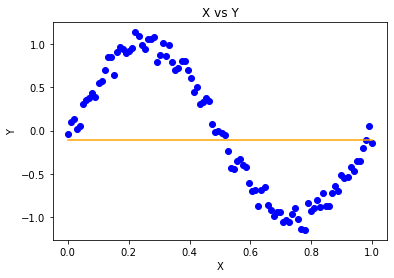

Weights for  1  degree [ 0.78248415 -1.63193249]
Train Loss for  1  degree 0.4628899548214312
Test loss for  1  degree 0.49189533256986434


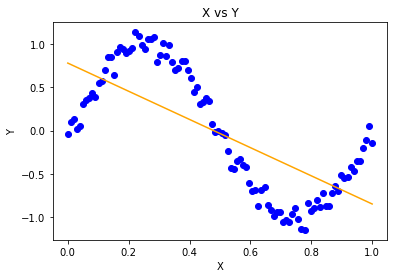

Weights for  2  degree [ 0.7765015  -1.65526987  0.04853245]
Train Loss for  2  degree 0.462524356412317
Test loss for  2  degree 0.49456715712654226


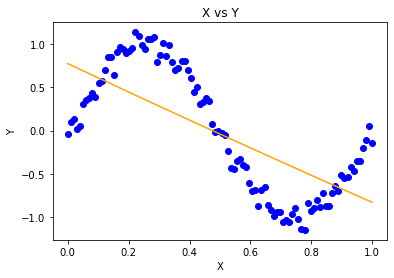

Weights for  3  degree [ 0.90251966 -1.76674564 -1.36607769  1.61957658]
Train Loss for  3  degree 0.43021283753030104
Test loss for  3  degree 0.4781896381592196


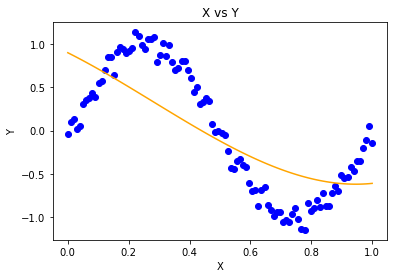

Weights for  4  degree [ 0.92311285 -1.32554565 -2.14883616 -0.06737505  2.2246937 ]
Train Loss for  4  degree 0.3854837274297317
Test loss for  4  degree 0.43951315457314283


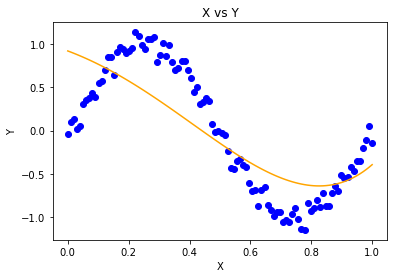

Weights for  5  degree [ 0.88421841 -0.83387802 -2.38479477 -0.98112623  0.80525223  2.30559281]
Train Loss for  5  degree 0.3432457311828693
Test loss for  5  degree 0.3978504456866848


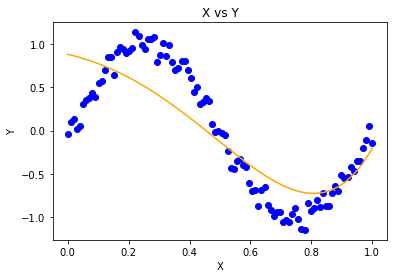

Weights for  6  degree [ 0.83241068 -0.46915278 -2.36187439 -1.3942121   0.01477429  1.21718048
  2.11634341]
Train Loss for  6  degree 0.3133607603527834
Test loss for  6  degree 0.3653412792163323


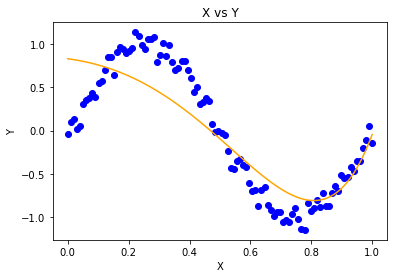

Weights for  7  degree [ 0.78733715 -0.24670312 -2.24732046 -1.53128229 -0.38031132  0.59653598
  1.30916601  1.79505594]
Train Loss for  7  degree 0.29843847266319407
Test loss for  7  degree 0.3457425535437178


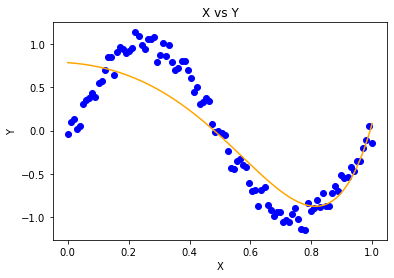

Weights for  8  degree [ 0.75508303 -0.1359021  -2.122218   -1.53323458 -0.54534649  0.27306468
  0.84518305  1.21122819  1.42672544]
Train Loss for  8  degree 0.2948852517509913
Test loss for  8  degree 0.3371356660776905


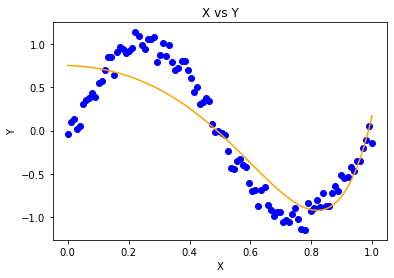

Weights for  9  degree [ 0.73567856 -0.0992967  -2.02016776 -1.4815953  -0.58793759  0.12705379
  0.60082517  0.87875739  1.01757151  1.06324021]
Train Loss for  9  degree 0.2971346085428396
Test loss for  9  degree 0.3354750349278434


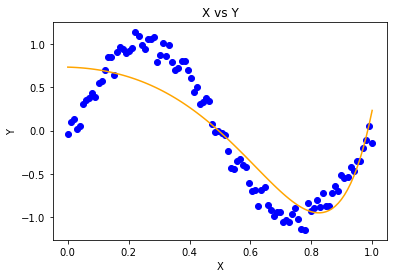

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     

   
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
        self.train_loss=0
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
       
                 
        # gradient descent learning
        lossTracker=[]
        loss=0
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
         
            error = (h - self.Y)
            #print(error)
            
            
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_transform.T, error )
            
        #print(self.W)
        #print(Y)
        
        train_pred=np.dot(X_transform,self.W)
        self.train_loss=math.sqrt(np.mean((train_pred-Y)**2))
        #print("Train loss--",train_loss)
        return self.W,self.train_loss 
     
   
        
        
        
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
       # X_transform = self.transform( X )
         
        m, n = X.shape 
        
        X_transform = np.ones( ( m, 1 ) )
        
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   
     
    # Create dataset
    n=100
    X = np.sort(np.linspace(0, 1, n))
    N = np.random.normal(0, 1, size=100)
    Y = np.sin(2*np.pi*X)+ N*0.1
    X=X.reshape(-1,1)
    
     
    
    
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.5, random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
  
    # model training
    TrainTracker=[]
    TestTracker=[]
    for i in range(10):
        model = PolynomailRegression( degree = i, learning_rate = 0.01, iterations = 30000 )
    
        W,train_loss=model.fit( X_train, Y_train )
        print("Weights for ",i," degree",model.W) 
        print("Train Loss for ",i," degree",model.train_loss)
        # Prediction on training set
        TrainTracker.append(model.train_loss)
        Y_pred = model.predict( X )
   
        # Visualization
    
        y_predic=model.predict(X_test)
        test_error=y_predic-Y_test
        print("Test loss for ",i," degree",math.sqrt(np.mean((test_error)**2)))
        TestTracker.append(math.sqrt(np.mean((test_error)**2)))
        plt.scatter( X, Y, color = 'blue' )
    
  
        plt.plot( X, Y_pred, color = 'orange' )
     
        plt.title( 'X vs Y' )
     
        plt.xlabel( 'X' )
     
        plt.ylabel( 'Y' )
     
        plt.show()
    
    
    
 
if __name__ == "__main__" :
     
    main()

## Applying Regularization.

Weights for  1  penalty [-1.07774936e+74 -1.07965956e+74 -1.08059665e+74 -1.08118884e+74
 -1.08160287e+74 -1.08191105e+74 -1.08215085e+74 -1.08234376e+74
 -1.08250300e+74 -1.08263713e+74]
Train Loss for  1  penalty 4.355407269697383e+74
Test loss for  1  penalty 3.6261194598784237e+74


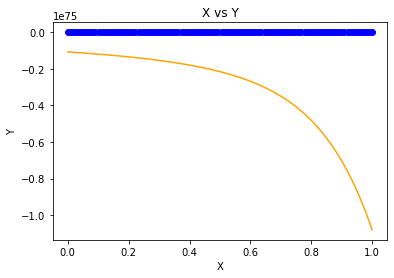

Weights for  0.1  penalty [-2.96874053e+14 -3.02361204e+14 -3.05064465e+14 -3.06776667e+14
 -3.07975710e+14 -3.08869328e+14 -3.09565368e+14 -3.10125766e+14
 -3.10588643e+14 -3.10978741e+14]
Train Loss for  0.1  penalty 1230008703119781.8
Test loss for  0.1  penalty 1022260780966913.2


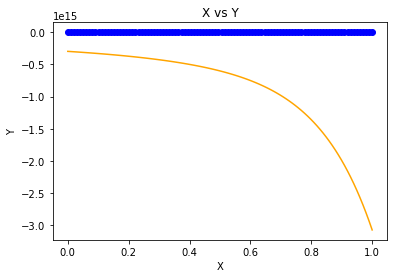

Weights for  0.01  penalty [-0.54096113 -0.80677784 -0.87639891 -0.90201923 -0.91462387 -0.92282175
 -0.92933286 -0.93507834 -0.94038016 -0.94535197]
Train Loss for  0.01  penalty 3.1212083788073475
Test loss for  0.01  penalty 2.600976465602285


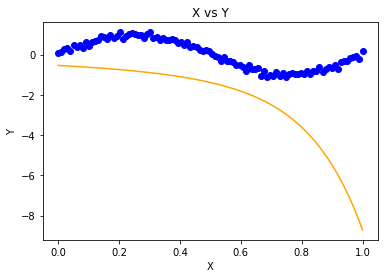

Weights for  0.001  penalty [ 0.00923539 -0.12076606 -0.12067666 -0.1011861  -0.0817205  -0.06574093
 -0.05324905 -0.0435839  -0.03608262 -0.03021326]
Train Loss for  0.001  penalty 0.6097239156051996
Test loss for  0.001  penalty 0.6659640473699989


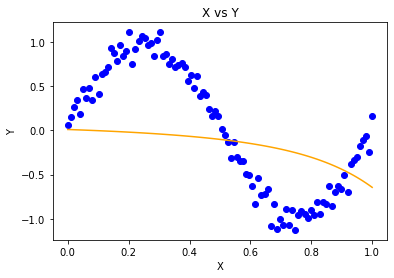

Weights for  0.0001  penalty [ 0.01433262 -0.11274835 -0.11112918 -0.09063852 -0.07045696 -0.05393479
 -0.0410147  -0.03100117 -0.02320972 -0.01709415]
Train Loss for  0.0001  penalty 0.6123093202215251
Test loss for  0.0001  penalty 0.6675320683833253


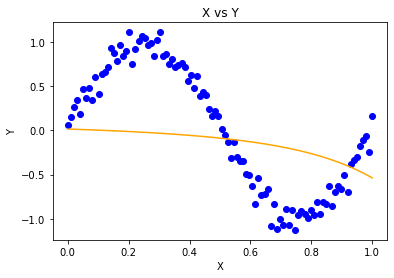

Weights for  1e-05  penalty [ 0.0147628  -0.11205657 -0.11030015 -0.08971971 -0.06947383 -0.0529029
 -0.03994433 -0.02989948 -0.02208193 -0.01594421]
Train Loss for  1e-05  penalty 0.612655102107243
Test loss for  1e-05  penalty 0.6677452786149687


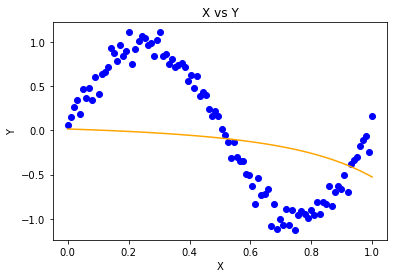

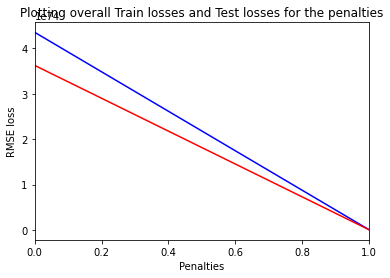

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations, penalty ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
        
        self.penalty=penalty
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     

   
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
        self.train_loss=0
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
       
                 
        # gradient descent learning
        lossTracker=[]
        loss=0
        sumofw=0
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
            
            error = (h - self.Y)
            #print(error)
            
            
            # update weights
            
            self.W = self.W - (self.learning_rate * ( 1 / self.m ) * np.dot( X_transform.T, error ) + (self.penalty/2)*sum(abs(self.W)) )
            
        #print(self.W)
        #print(Y)
        
        train_pred=np.dot(X_transform,self.W)
        self.train_loss=math.sqrt(np.mean((train_pred-Y)**2))
        #print("Train loss--",train_loss)
        return self.W,self.train_loss 
     
   
        
        
        
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
       # X_transform = self.transform( X )
         
        m, n = X.shape 
        
        X_transform = np.ones( ( m, 1 ) )
        
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   
     
    # Create dataset
    n=100
    X = np.sort(np.linspace(0, 1, n))
    N = np.random.normal(0, 1, size=100)
    Y = np.sin(2*np.pi*X)+ N*0.1
    X=X.reshape(-1,1)
    
     
    
    
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.5, random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
  
    # model training
    TrainTracker=[]
    TestTracker=[]
    penalties=[1,0.1,0.01,0.001,0.0001,0.00001]
    for i in penalties:
        model = PolynomailRegression( degree = 9, learning_rate = 0.01, iterations = 100, penalty=i )
    
        W,train_loss=model.fit( X_train, Y_train )
        print("Weights for ",i," penalty",model.W) 
        print("Train Loss for ",i," penalty",model.train_loss)
        # Prediction on training set
        TrainTracker.append(model.train_loss)
        Y_pred = model.predict( X )
   
        # Visualization
    
        y_predic=model.predict(X_test)
        test_error=y_predic-Y_test
        print("Test loss for ",i," penalty",math.sqrt(np.mean((test_error)**2)))
        TestTracker.append(math.sqrt(np.mean((test_error)**2)))
        plt.scatter( X, Y, color = 'blue' )
    
  
        plt.plot( X, Y_pred, color = 'orange' )
     
        plt.title( 'X vs Y' )
     
        plt.xlabel( 'X' )
     
        plt.ylabel( 'Y' )
     
        plt.show()
    
    
    plt.plot(TrainTracker, label="train" ,color="blue")
    plt.plot(TestTracker, label="test" ,color="red")
    plt.title( 'Plotting overall Train losses and Test losses for the penalties' )
    plt.xlabel( 'Penalties' )
    plt.xlim(0,1)
    plt.ylabel( 'RMSE loss' )
    plt.show()
 
if __name__ == "__main__" :
     
    main()

In [5]:
l=[]
o=[]
u=[]

data = [l,o,u]

In [3]:
print(tabulate(data, headers=["Name","User ID", "Roll. No."]))

Name        User ID    Roll. No.
--------  ---------  -----------
Himanshu       1123      10025
Rohit          1126      10029
Sha          111178       7355.4


In [4]:
print(tabulate(degree0weights))
print(tabulate(degree1weights))
print(tabulate(degree3weights))
print(tabulate(degree9weights))

NameError: name 'degree0weights' is not defined